In [1]:
import pandas as pd
import numpy as np
from ipynb.fs.defs.Preprocessing_Module import read_data, add_topological, add_landcover, select_columns, reshape_dataset, fillna_dataset
from ipynb.fs.defs.Feature_Expansion_Module import feature_expansion
from ipynb.fs.defs.Initializer_Module import initializer
from ipynb.fs.defs.XGBoost_Model_Module import Xgboost_model
from ipynb.fs.defs.Model_Validation_Module import test_model_random_split, train_model_KFold, operational_validation, predict

In [2]:
import warnings
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)

In [3]:
data = read_data('../Datasets/Greece/GRE_culex_2011_2022.csv')
#=====================================================================
data = data[data.nuts2_name == 'CENTRAL MACEDONIA']
data = data.reset_index(drop=True)
#=====================================================================
columns = ['dt_placement', 'x', 'y', 'culex spp.', 'ndvi', 'ndwi', 'ndmi', 'ndbi',
           'ndvi_mean', 'ndvi_std', 'ndwi_mean', 'ndwi_std', 'ndmi_mean',
           'ndmi_std', 'ndbi_mean', 'ndbi_std', 'lst_day', 'lst_night',
           'acc_rainfall_1week', 'acc_rainfall_2week', 'acc_rainfall_jan',
           'lst_jan_day_mean', 'lst_feb_day_mean', 'lst_mar_day_mean', 'lst_apr_day_mean',
           'lst_jan_night_mean', 'lst_feb_night_mean', 'lst_mar_night_mean', 'lst_apr_night_mean']
names = ['dt_placement', 'x', 'y', 'mosq_now', 'ndvi', 'ndwi', 'ndmi', 'ndbi',
         'ndvi_mean', 'ndvi_std', 'ndwi_mean', 'ndwi_std', 'ndmi_mean',
         'ndmi_std', 'ndbi_mean', 'ndbi_std', 'lst_day', 'lst_night',
         'acc_rainfall_1week', 'acc_rainfall_2week', 'acc_rainfall_jan',
         'lst_jan_day_mean', 'lst_feb_day_mean', 'lst_mar_day_mean', 'lst_apr_day_mean',
         'lst_jan_night_mean', 'lst_feb_night_mean', 'lst_mar_night_mean', 'lst_apr_night_mean']
data = select_columns(data,columns,names)
data = add_topological(data,'../Datasets/Topological Datasets/2x2grid/greece_2km_geo.csv')
data = add_landcover(data,'../Datasets/Landcover Datasets/2x2grid/greece_2km_lulc.csv')
data = reshape_dataset(data,['x','y','dt_placement'])
data = fillna_dataset(data,{'acc_rainfall_1week':0, 'acc_rainfall_2week':0, 'acc_rainfall_jan':0})

Index(['trap_id', 'station_id', 'x', 'y', 'dt_placement', 'week', 'month',
       'year', 'country_code', 'nuts0_code', 'nuts0_name', 'nuts1_code',
       'nuts1_name', 'nuts2_code', 'nuts2_name', 'nuts3_code', 'nuts3_name',
       'lau1_municipality', 'lau2_settlement', 'trap_type', 'culex spp.',
       'region', 'dt_placement_original', 'indices_image_date', 'indices_lat',
       'indices_lon', 'ndvi', 'ndmi', 'ndwi', 'ndbi', 'ndvi_mean', 'ndmi_mean',
       'ndwi_mean', 'ndbi_mean', 'ndvi_std', 'ndmi_std', 'ndwi_std',
       'ndbi_std', 'lst_image_date', 'lst_lat', 'lst_lon', 'lst_day',
       'lst_night', 'monthly_lst_lat', 'monthly_lst_lon', 'lst_jan_day_mean',
       'lst_jan_night_mean', 'lst_feb_day_mean', 'lst_feb_night_mean',
       'lst_mar_day_mean', 'lst_mar_night_mean', 'lst_apr_day_mean',
       'lst_apr_night_mean', 'indices_image_date.1', 'indices_lat.1',
       'indices_lon.1', 'acc_rainfall_jan', 'dt_placement_minus_7',
       'dt_placement_minus_14', 'dt_placement_m

In [4]:
# set the only_env as True if you want to use only environmental features
only_env = True
# set the case title
case_title = 'Culex Greece'
# set the exp as True if you want to save the results as csv
exp = False
# set the filepath to export the data
path = '../Results/Culex Greece/'
# set the name of the date column
date_col = 'dt_placement'
# set the model type. Could be 'class_regression' or 'mosquito_regression' or 'classification'
model_type = 'class_regression'
# set the transform argument as True if you want to limit the target variable to 0-9 scale
transform_target = False
#set the data for embeddings e.g. data[['col', 'col2']]
embedded_data = None
#set the transformation actions of the data. Options are 'augmentation', 'normalization', 'log', 'scaling'
transformation_list = []

In [5]:
data = feature_expansion(data, env=only_env)

In [6]:
data = initializer(data, model_type, 10, dropna=True)

Bounds: [    0.      5.     14.     28.     50.     85.    144.    238.    405.6
   754.  10458. ]


In [7]:
model = Xgboost_model(model_type = model_type, learning_rate = 0.2,
                      embedding_data = embedded_data,  transformation_list = transformation_list,
                      early_stop = False, l1_weight = 1.5, l2_weight = 0, weights = False)

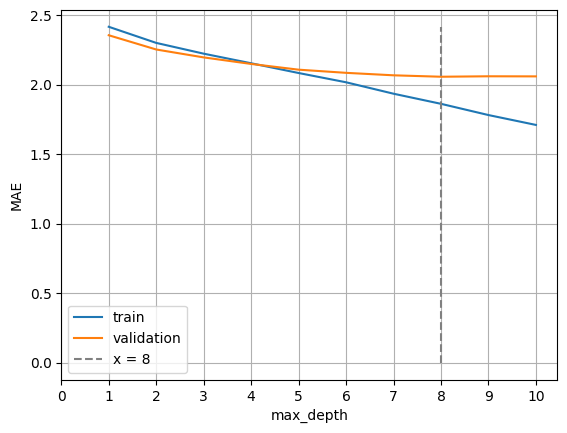

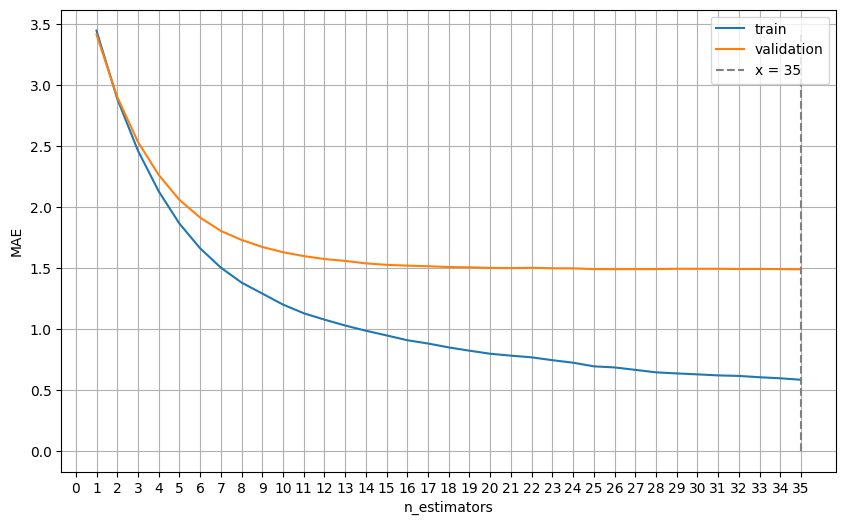

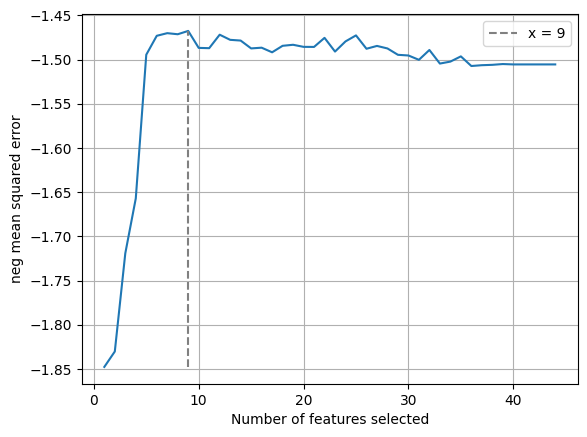

max_depth:  8
Number of estimators:  35
Selected_features:  Index(['lst_apr_night_mean', 'DISTANCE_TO_COAST', 'ELEVATION_mean_1km',
       'HILLSHADE_mean_1km', 'FLOW_ACCU_200m', 'null_island_distance',
       'days_distance', 'mo_cos', 'year'],
      dtype='object')


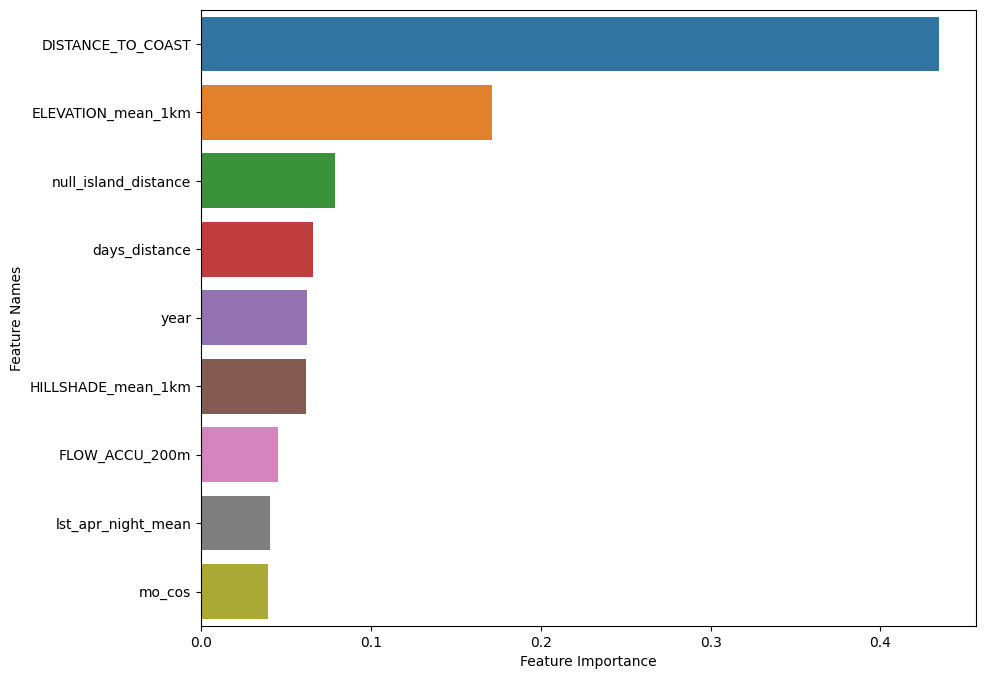

MAE on train set:  0.8826259946949602
min prediction: 0.0
max prediction: 9.0

MAE on test set:  1.4812797821647379
Error <= 3: 92.24 %
min prediction: 0.0
max prediction: 9.0


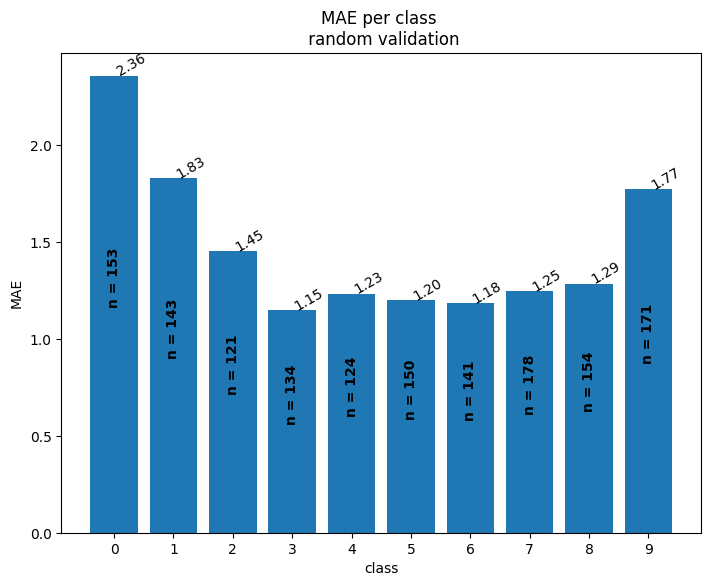

-----------|class error-MAE| difference-----------
mean: 0.42963214654563747
std: 0.2156439303819531
coefficient of variation (std/mean): 0.5019268975000837

----------normalized difference-------------
mean: 0.6899769418241335
std: 0.34631798575638306
coefficient of variation (std/mean): 0.5019268975000837


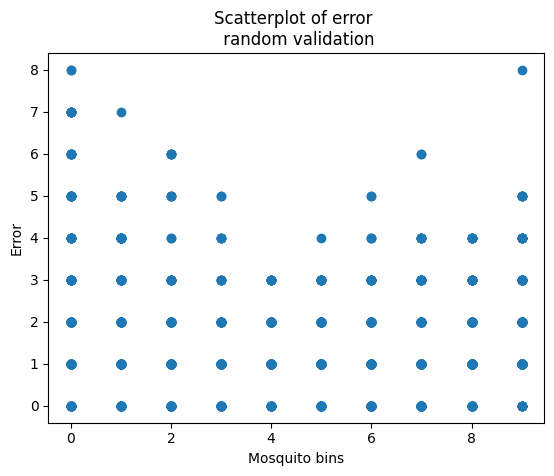

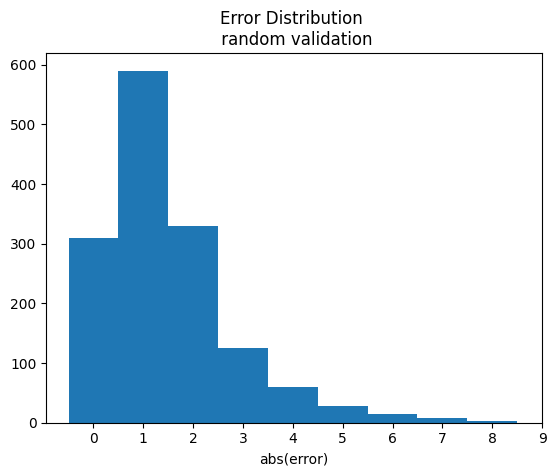

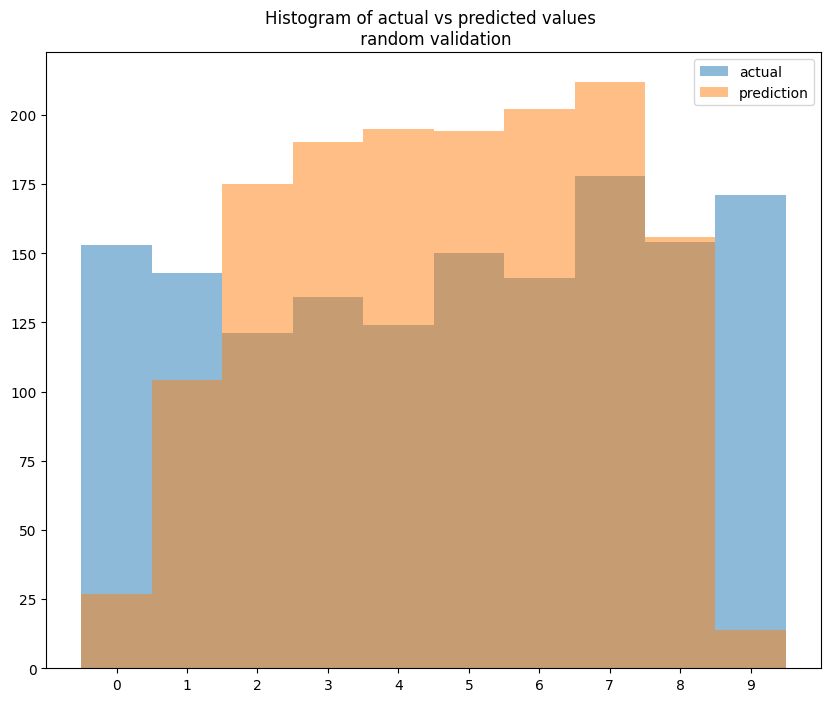

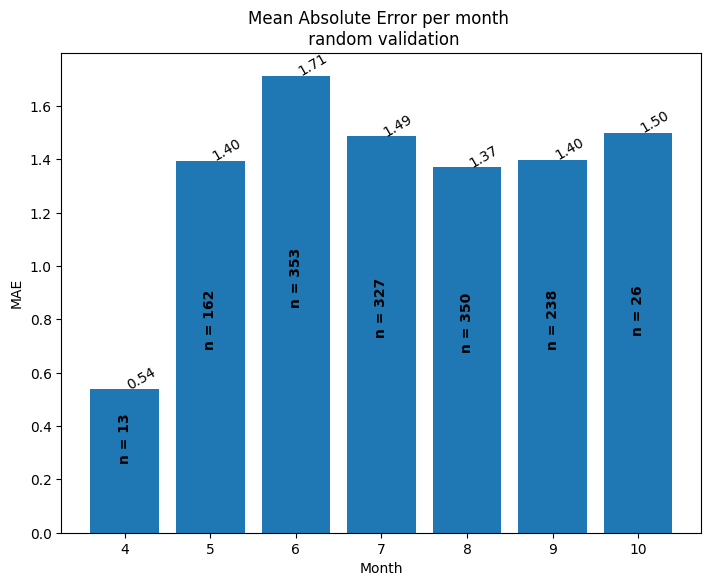

In [8]:
test_model_random_split(data, model, filepath = '', date_col = date_col, case='', fi = True, export=exp)

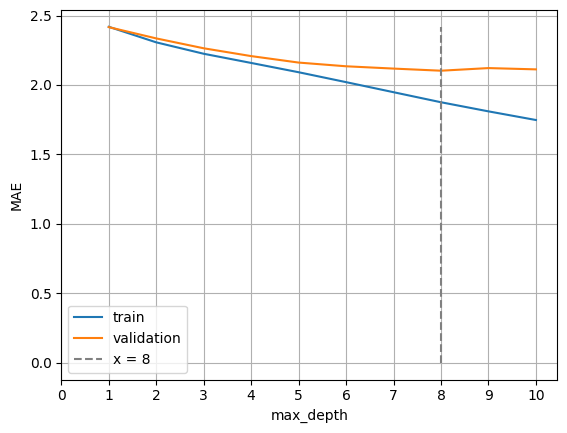

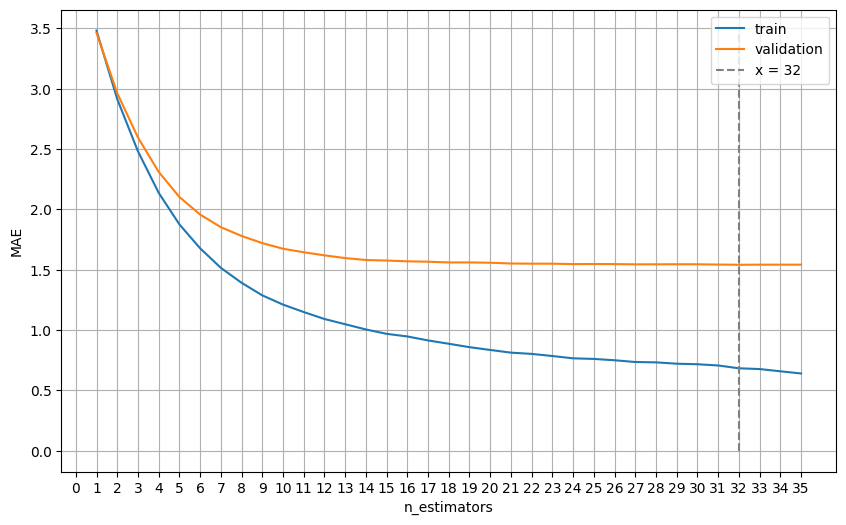

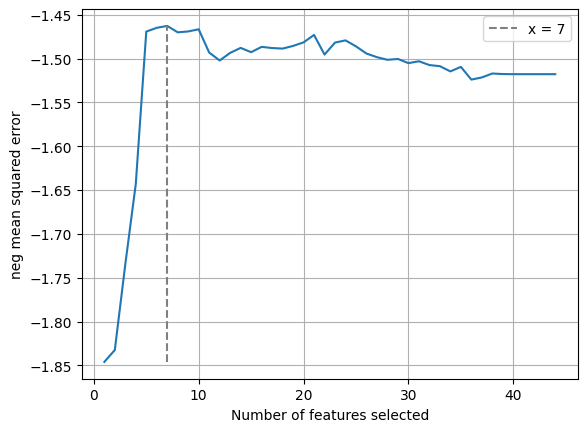

max_depth:  8
Number of estimators:  32
Selected_features:  Index(['DISTANCE_TO_COAST', 'ASPECT_mean_200m', 'ELEVATION_mean_1km',
       'HILLSHADE_mean_1km', 'null_island_distance', 'days_distance', 'year'],
      dtype='object')
MAE on train set:  0.9755489021956087
min prediction: 0.0
max prediction: 9.0

MAE on test set:  1.433723462166576
Error <= 3: 93.18 %
min prediction: 0.0
max prediction: 9.0


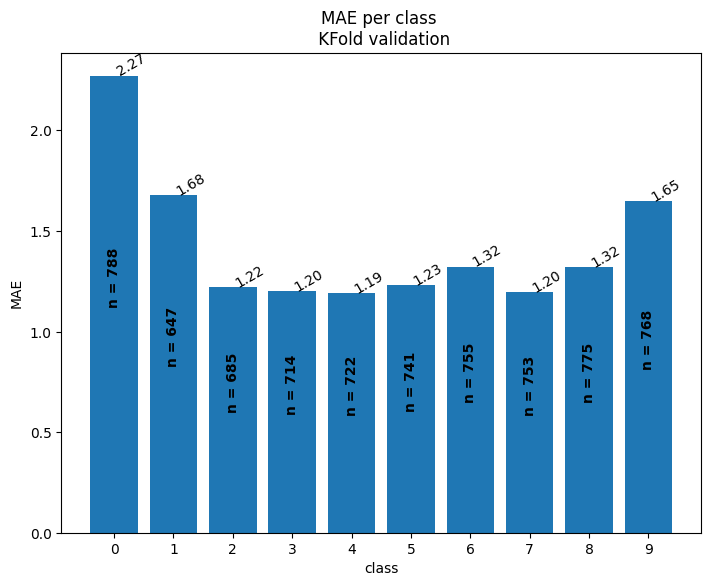

-----------|class error-MAE| difference-----------
mean: 0.35107189599810174
std: 0.1857387410998221
coefficient of variation (std/mean): 0.5290618338211454

----------normalized difference-------------
mean: 0.5634250907145076
std: 0.2980867117142626
coefficient of variation (std/mean): 0.5290618338211454


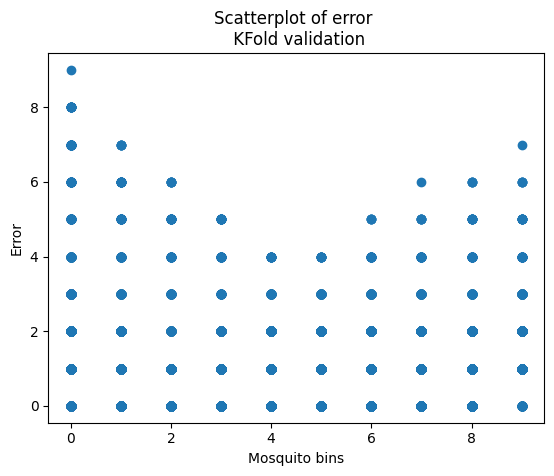

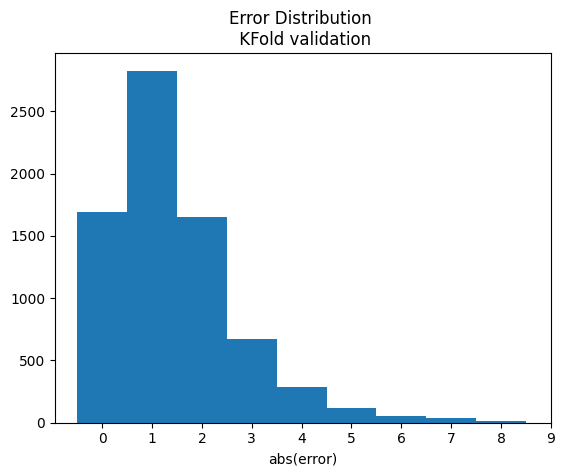

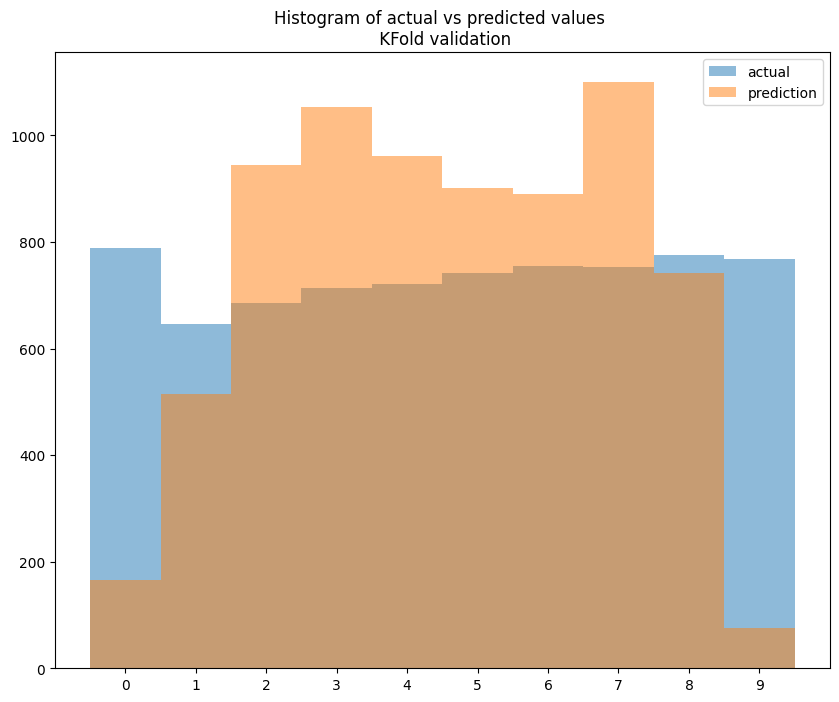

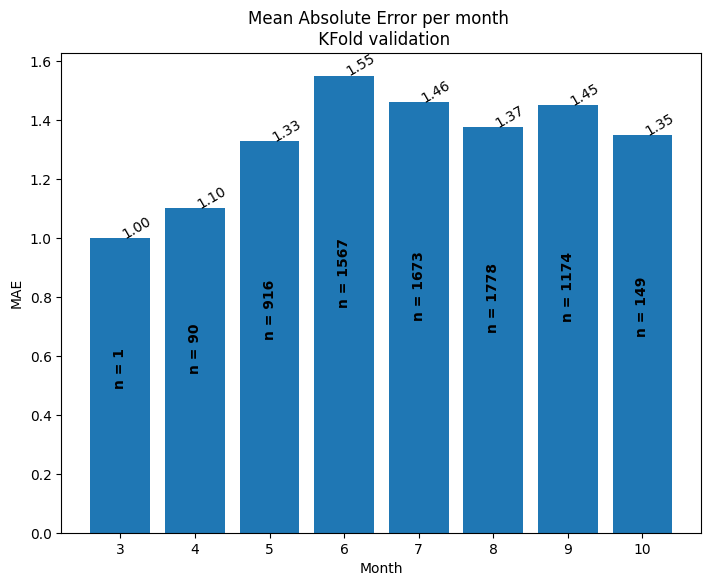

In [9]:
train_model_KFold(data, model, date_col=date_col)

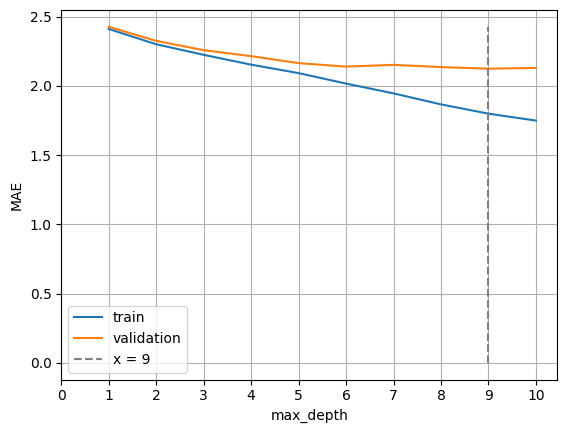

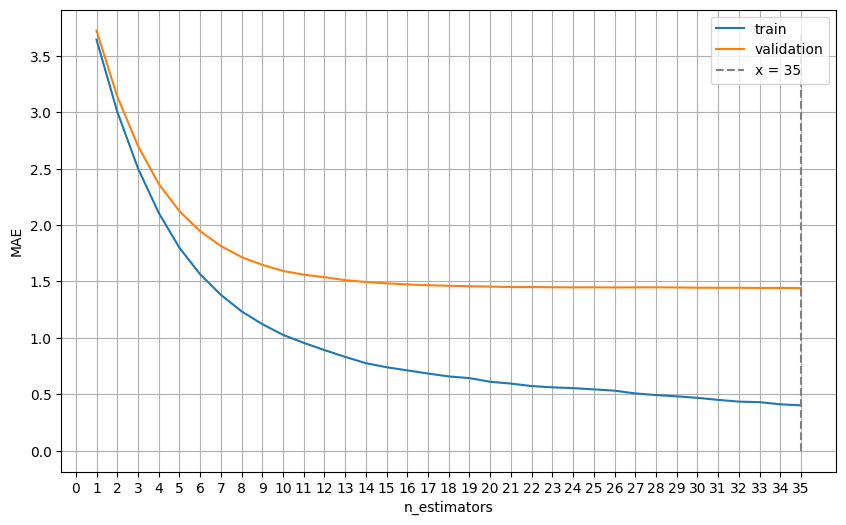

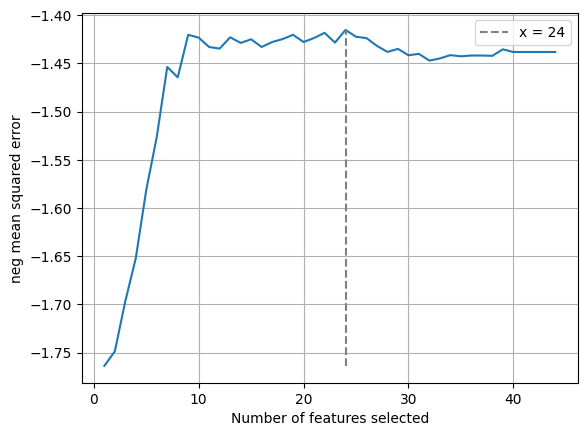

max_depth:  9
Number of estimators:  35
Selected_features:  Index(['x', 'y', 'lst_night', 'lst_feb_day_mean', 'lst_mar_day_mean',
       'lst_apr_day_mean', 'lst_jan_night_mean', 'lst_feb_night_mean',
       'lst_mar_night_mean', 'lst_apr_night_mean', 'DISTANCE_TO_COAST',
       'DISTANCE_TO_RIVER', 'ASPECT_mean_200m', 'ELEVATION_mean_1km',
       'HILLSHADE_mean_1km', 'FS_AREA_1km', 'FLOW_ACCU_200m', 'landcover',
       'null_island_distance', 'days_distance', 'mo_cos', 'year', 'lst',
       'summer_days_month'],
      dtype='object')
2021
MAE on train set:  0.5681938448684027
min prediction: 0.0
max prediction: 9.0

MAE on test set:  2.013755158184319
Error <= 3: 82.67 %
min prediction: 0.0
max prediction: 9.0


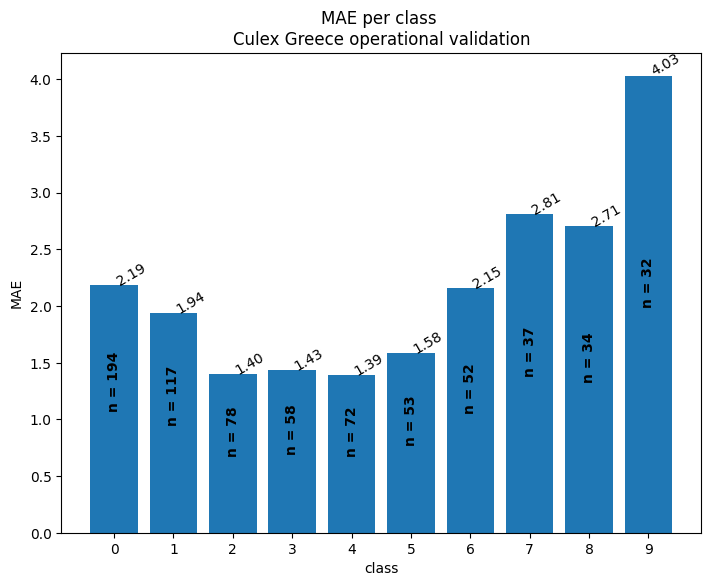

-----------|class error-MAE| difference-----------
mean: 1.8682707802460872
std: 0.794373148972998
coefficient of variation (std/mean): 0.42519165710463225

----------normalized difference-------------
mean: 0.7070459720248005
std: 0.3006300484943803
coefficient of variation (std/mean): 0.42519165710463214


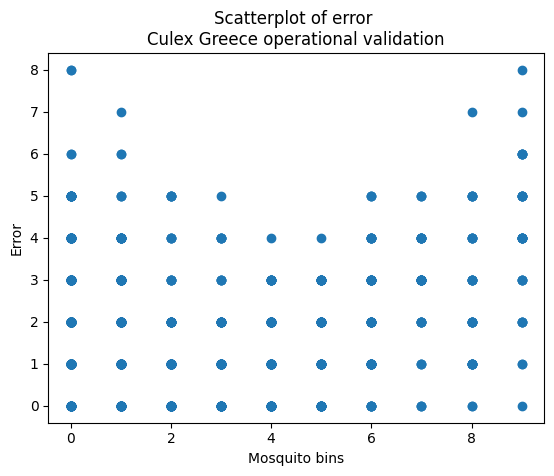

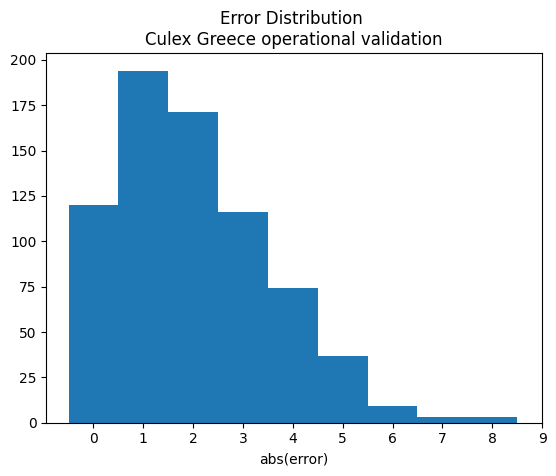

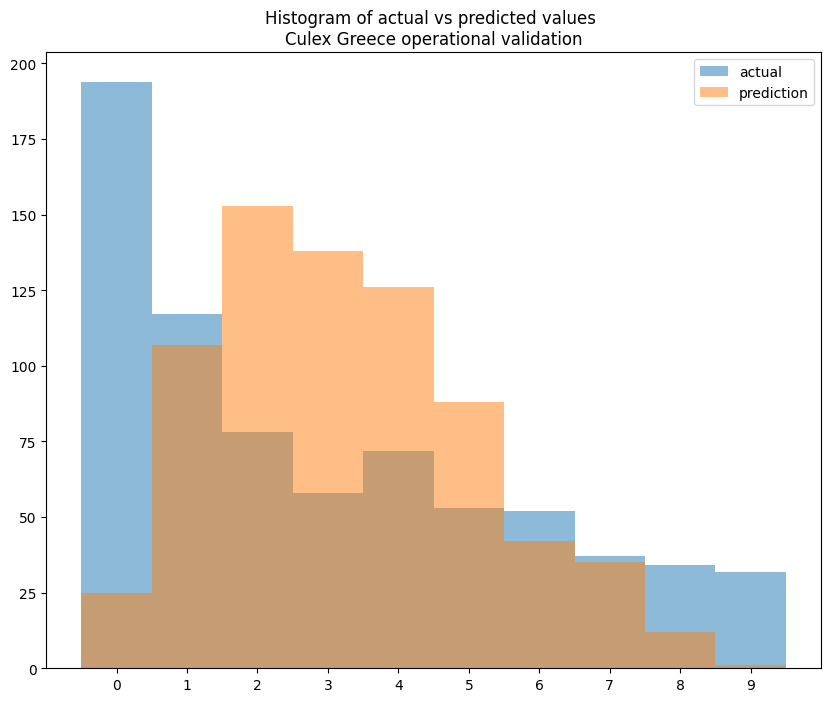

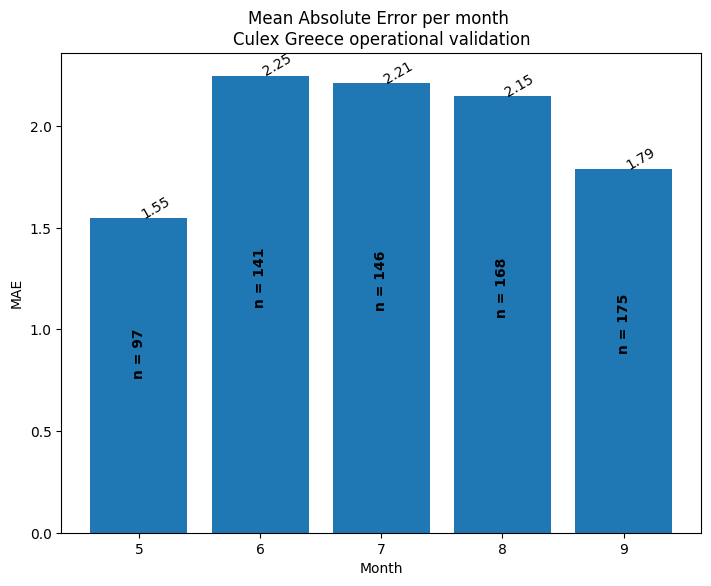

2022
MAE on train set:  0.5681938448684027
min prediction: 0.0
max prediction: 9.0

MAE on test set:  1.8330955777460771
Error <= 3: 84.45 %
min prediction: 0.0
max prediction: 9.0


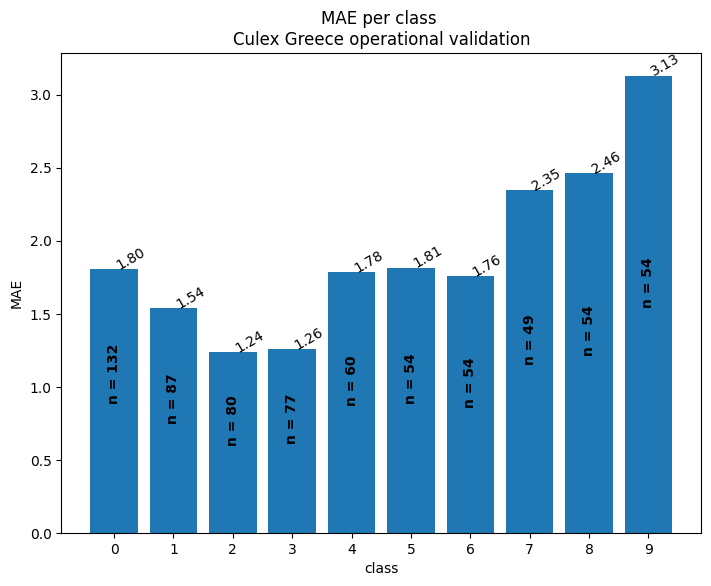

-----------|class error-MAE| difference-----------
mean: 1.215885707295806
std: 0.5527326355932441
coefficient of variation (std/mean): 0.4545925922778965

----------normalized difference-------------
mean: 0.642601695071921
std: 0.29212197036491494
coefficient of variation (std/mean): 0.4545925922778965


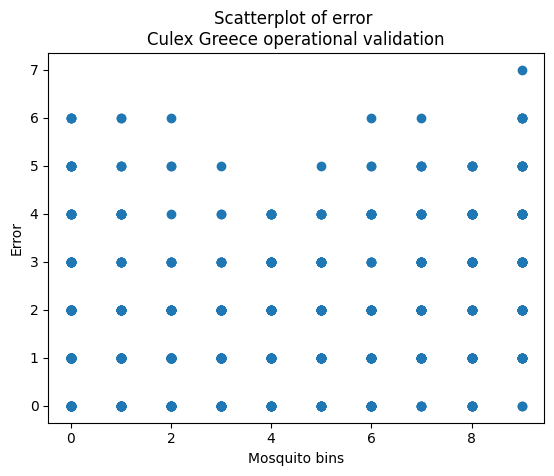

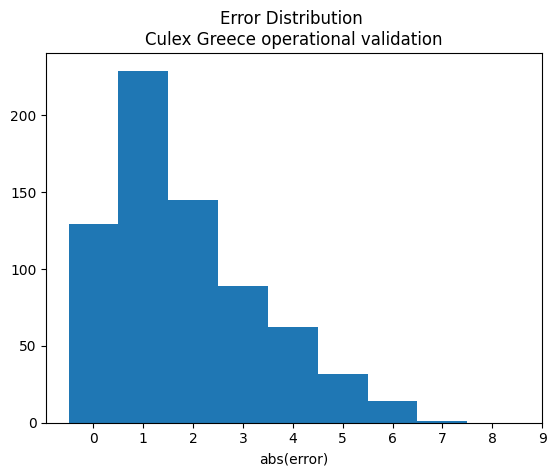

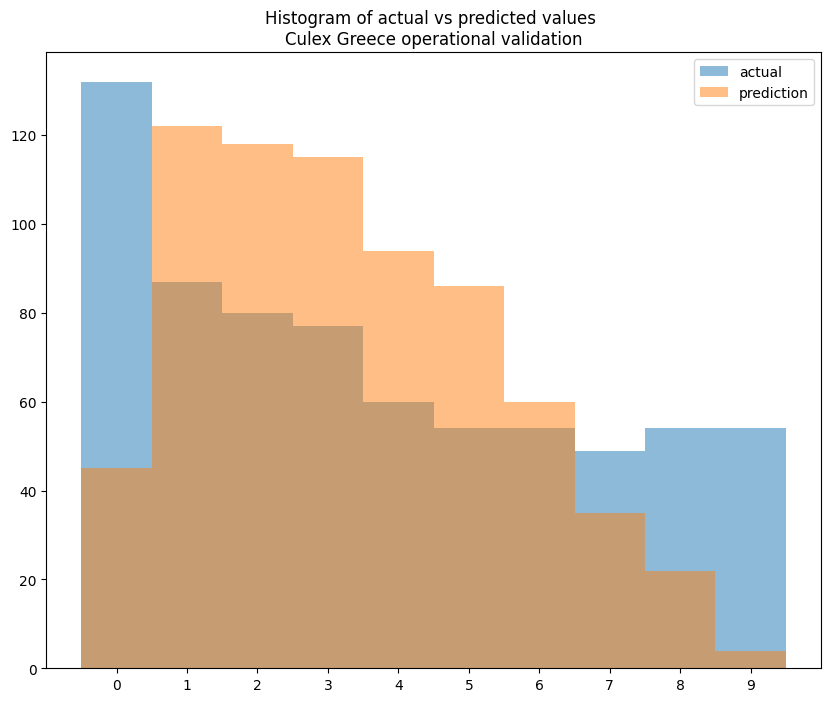

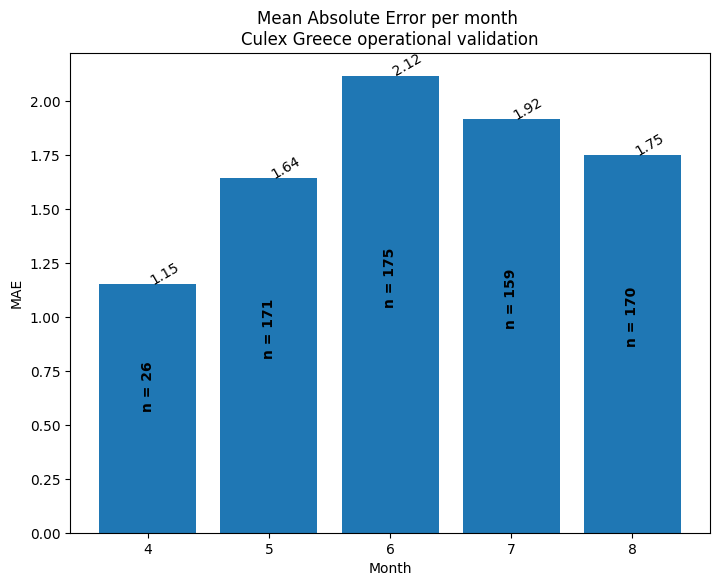

In [10]:
operational_validation(data, model, filepath = path, date_col = date_col,
                       date = '2021-01-01', case = case_title, export= exp)

operational validation:
stable features: 
    MAE on train set:  0.5545784799907738
    MAE on test set:  1.825962910128388
    Error <= 3: 87.87 %
All features:
    MAE on train set:  0.47696344135624497
    MAE on test set:  1.7717546362339516
    Error <= 3: 87.45 %
different fatures:
    MAE on train set:  0.6319916964594626
    MAE on test set:  1.891583452211127
    Error <= 3: 85.59 %

In [11]:
# import datetime
# df = pd.DataFrame(columns =['dt_placement', 'x', 'y'] )
# data2 = data[['dt_placement', 'x', 'y']]
# for i in range(len(data2)):
#     date = data2.loc[i,'dt_placement']
#     for j in range(-30,6):
#         df = df.append(pd.DataFrame([[date+datetime.timedelta(days=j), data2.loc[i,'x'], data2.loc[i,'y']]],columns =['dt_placement', 'x', 'y']),ignore_index = True)
# print(df.shape)
# df = df.drop_duplicates().reset_index(drop=True)
# df.to_csv('CM_previous.csv',index=False)
# df